# Titanic Survival Prediction

Analyze Titanic manifest data and understand factors predicting survival

Note, I learned someting about the value of data exploration here, because it turned out that every man died and every woman lived, according to this dataset. That didn't seem quite right.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

%matplotlib inline

## Import data



In [62]:
data = pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0.5, 0, 'Age')

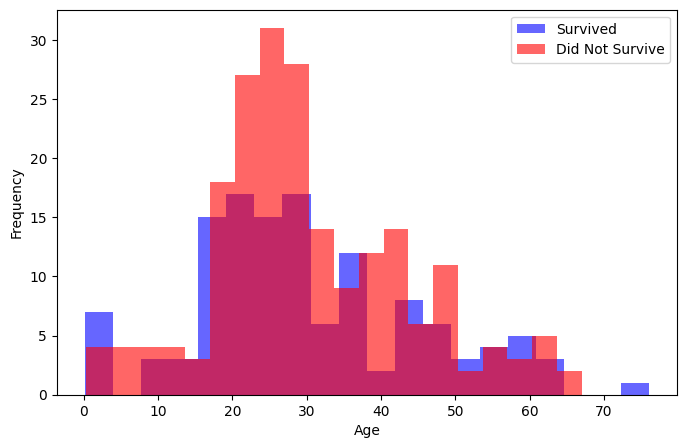

In [64]:
plt.figure(figsize=(8, 5))

data[data.Survived==1].Age.plot(bins=20, kind='hist', color='blue', 
                                       label='Survived', alpha=0.6)
data[data.Survived==0].Age.plot(bins=20, kind='hist', color='red', 
                                       label='Did Not Survive', alpha=0.6)

plt.legend()
plt.xlabel("Age")

Text(0.5, 0, 'Fare')

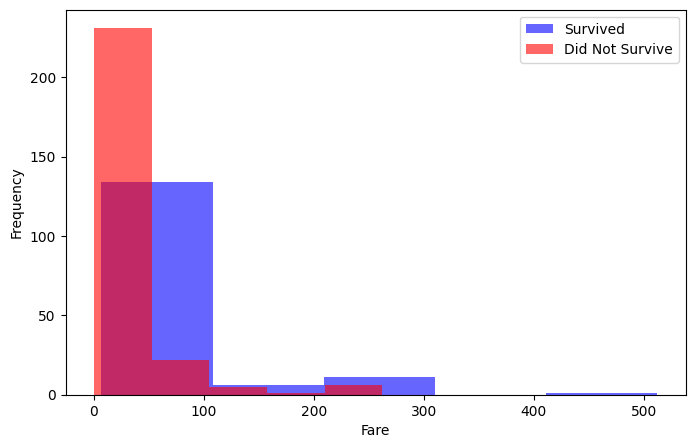

In [65]:
plt.figure(figsize=(8, 5))

data[data.Survived==1].Fare.plot(bins=5, kind='hist', color='blue', 
                                       label='Survived', alpha=0.6)
data[data.Survived==0].Fare.plot(bins=5, kind='hist', color='red', 
                                       label='Did Not Survive', alpha=0.6)

plt.legend()
plt.xlabel("Fare")

Text(0, 0.5, 'Count')

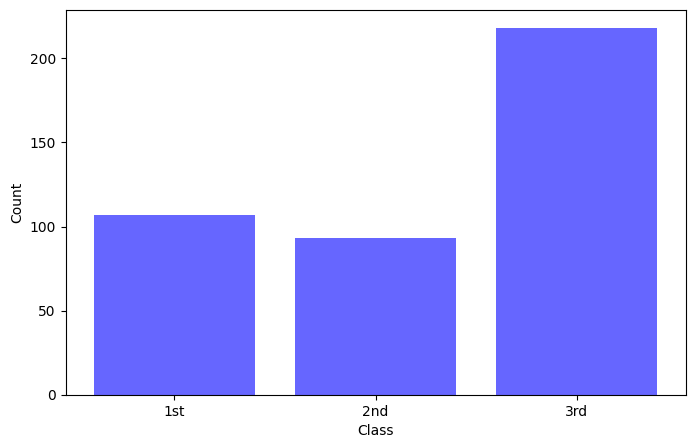

In [66]:
plt.figure(figsize=(8, 5))

class_ = ['1st', '2nd', '3rd']

first = data[data.Pclass==1].__len__()
second = data[data.Pclass==2].__len__()
third = data[data.Pclass==3].__len__()

counts = [first, second, third]
plt.bar(class_, counts, color='blue', alpha=0.6)
plt.xlabel("Class")
plt.ylabel("Count")

/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_14604/4115272699.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  first_survived = data[data.Pclass==1][data.Survived==1].__len__()
/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_14604/4115272699.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  first_died = data[data.Pclass==1][data.Survived==0].__len__()
/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_14604/4115272699.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  second_survived = data[data.Pclass==2][data.Survived==1].__len__()
/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_14604/4115272699.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  second_died = data[data.Pclass==2][data.Survived==0].__len__()
/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_14604/4115272699.py:9: UserWarning: Boolean

Text(0, 0.5, 'Count')

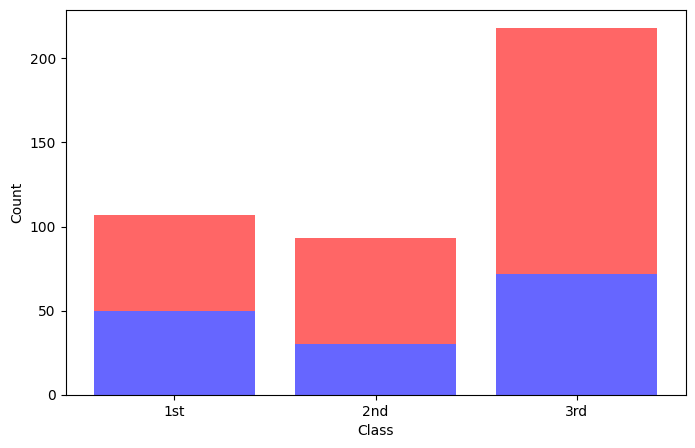

In [67]:
plt.figure(figsize=(8, 5))

class_ = ['1st', '2nd', '3rd']

first_survived = data[data.Pclass==1][data.Survived==1].__len__()
first_died = data[data.Pclass==1][data.Survived==0].__len__()
second_survived = data[data.Pclass==2][data.Survived==1].__len__()
second_died = data[data.Pclass==2][data.Survived==0].__len__()
third_survived = data[data.Pclass==3][data.Survived==1].__len__()
third_died = data[data.Pclass==3][data.Survived==0].__len__()

survived = [first_survived, second_survived, third_survived]
died = [first_died, second_died, third_died]
plt.bar(class_, survived, color='blue', alpha=0.6)
plt.bar(class_, died, color='red', alpha=0.6, bottom=survived)
plt.xlabel("Class")
plt.ylabel("Count")

/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_14604/921382653.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_survived = data[data.Survived==1][data.Sex=="female"].__len__()
/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_14604/921382653.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_died = data[data.Survived==0][data.Sex=="female"].__len__()
/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_14604/921382653.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_survived = data[data.Survived==1][data.Sex=="male"].__len__()
/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_14604/921382653.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_died = data[data.Survived==0][data.Sex=="male"].__len__()


Text(0, 0.5, 'Count')

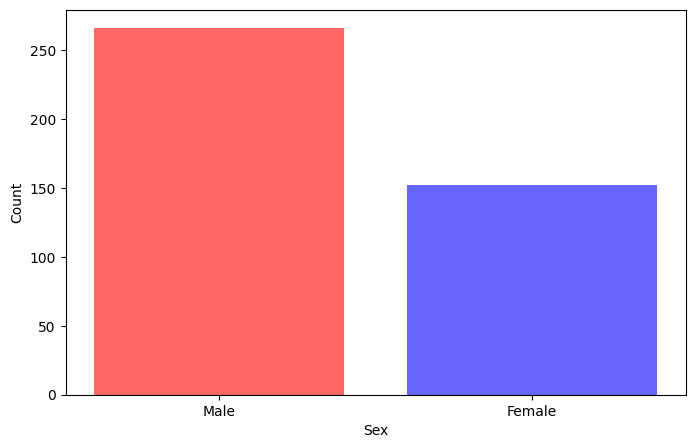

In [72]:
plt.figure(figsize=(8, 5))
sex_ = ["Male","Female"]

female_survived = data[data.Survived==1][data.Sex=="female"].__len__()
female_died = data[data.Survived==0][data.Sex=="female"].__len__()
male_survived = data[data.Survived==1][data.Sex=="male"].__len__()
male_died = data[data.Survived==0][data.Sex=="male"].__len__()

survived = [male_survived, female_survived]
died = [male_died, female_died]

plt.bar(sex_, survived, color='blue', alpha=0.6)
plt.bar(sex_, died, color='red', alpha=0.6, bottom=survived)
plt.xlabel("Sex")
plt.ylabel("Count")

Yeah this dataset is off. I expected a sex imbalance in survival rates because of the movie. But not like this.

At least I learned how to make bar charts with matplotlib.

https://www.kaggle.com/datasets/brendan45774/test-file/discussion/409611